<a href="https://colab.research.google.com/github/ctotti/INPE_Disciplinas/blob/main/Processamento_LaRad_CEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import zipfile
import os
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Arquivo do drive com medições realizadas em laboratório [aqui](https://drive.google.com/drive/folders/1Cq6e_cFMjdLmWZD37XqYfd2VUfVCoIFi?usp=drive_link).

## FOV & IFOV

In [4]:
h = 17.78   # altura: 17.78 cm ou 7 polegadas

## ÁGUA

## Placa Água Referência
Medições da placa utilizadas como ref. para todas as medições dos alvos de água.

Diretório: [7_Placa_50](https://drive.google.com/drive/folders/1VqBShMpw3w1DPtHujIKKOPv07oG8xdIr?usp=drive_link)

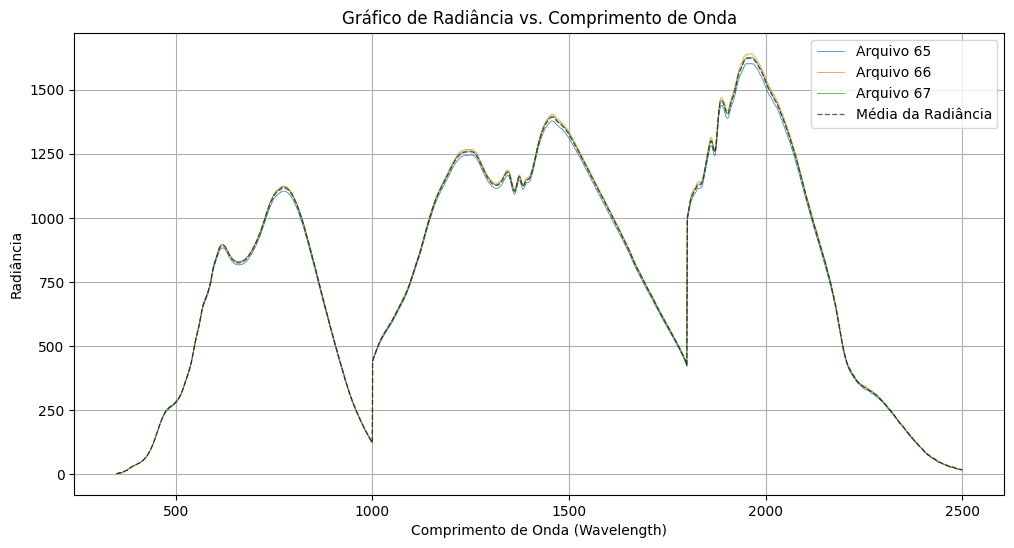

In [5]:
import gdown
# MEDIÇÕES DA PLACA DE REFERÊNCIA PARA ÁGUA ========================================================================================================
# OBTENDO ARQUIVOS ---------------------------------------------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1a5vLN2xpvf1J9HMf9ImJcoLkMvgtMY6O', # 65 = https://drive.google.com/file/d/1a5vLN2xpvf1J9HMf9ImJcoLkMvgtMY6O/view?usp=drive_link
    'https://drive.google.com/uc?id=1oVdtt_CYwaesANY3E_NdeDMTjhMo-T-t', # 66 = https://drive.google.com/file/d/1oVdtt_CYwaesANY3E_NdeDMTjhMo-T-t/view?usp=drive_link
    'https://drive.google.com/uc?id=1oeMwBY0noYR0l-qjRHpX0c61r2woUTFy'  # 67 = https://drive.google.com/file/d/1oeMwBY0noYR0l-qjRHpX0c61r2woUTFy/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['placa50_65.txt', 'placa50_66.txt', 'placa50_67.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
AguaPlaca_MR = pd.DataFrame()
AguaPlaca_MR['Wavelength'] = data_frames[0]['Wavelength']

sufixos_placa = ['65', '66', '67']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixos_placa in zip(data_frames, sufixos_placa):
    AguaPlaca_MR[f'Radiância_{sufixos_placa}'] = data[f'Turma 1 CEA000{sufixos_placa}.asd']

# Calcular a média das colunas de radiância
AguaPlaca_MR['Radiância_Média'] = AguaPlaca_MR.iloc[:, 1:].mean(axis=1)
# AguaPlaca_MR.head()

# PLOTANDO MEDIÇÕES E MÉDIA DA PLACA PARA ÁGUA -------------------------------------------------------------------------------------------------
# PLOT MEDICÕES RADIÂNCIA E MÉDIA
plt.figure(figsize=(12, 6))

sufixos_placa = ['65', '66', '67']

for sufixo in sufixos_placa:
    plt.plot(AguaPlaca_MR['Wavelength'], AguaPlaca_MR[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(AguaPlaca_MR['Wavelength'], AguaPlaca_MR['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--', alpha=0.6)

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

## Placa Água Padrão
Diretório: https://drive.google.com/drive/folders/1p17VcZC6rU8J4IBO8A94oEsHWnHJdslR?usp=drive_link

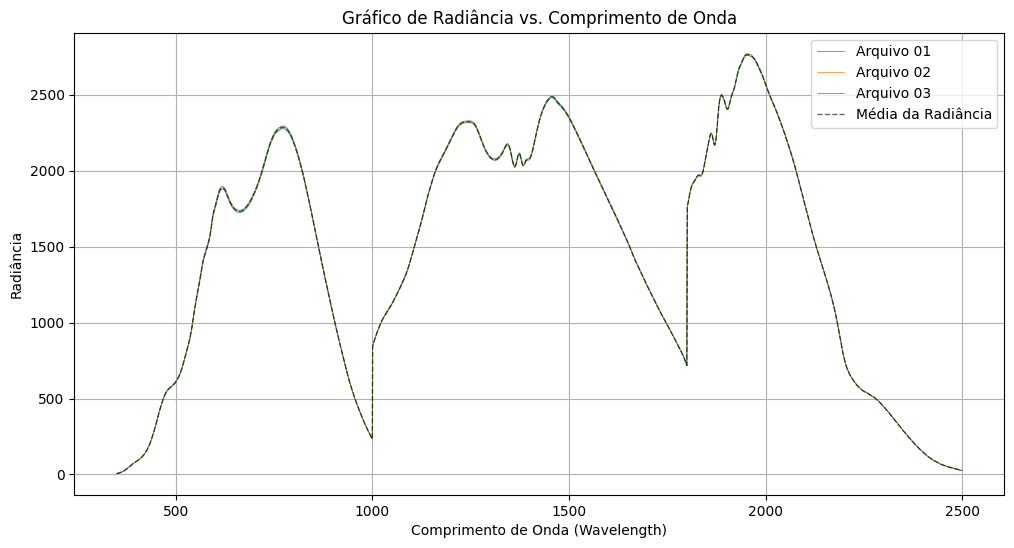

In [23]:
# MEDIÇÕES DA PLACA DE REFERÊNCIA PARA ÁGUA ========================================================================================================
# OBTENDO ARQUIVOS ---------------------------------------------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1DfEHAIM0hVIG4Mhy5KYF6WnMg0dawtVV', # 01 = https://drive.google.com/file/d/1DfEHAIM0hVIG4Mhy5KYF6WnMg0dawtVV/view?usp=drive_link
    'https://drive.google.com/uc?id=11A01f7zq5xcWQPHlPw7_yx6t3dhaArL7', # 02 = https://drive.google.com/file/d/11A01f7zq5xcWQPHlPw7_yx6t3dhaArL7/view?usp=drive_link
    'https://drive.google.com/uc?id=183_mVFhz5DUDzfN_KcJUT8T3LUEGZI7R',  # 03 = https://drive.google.com/file/d/183_mVFhz5DUDzfN_KcJUT8T3LUEGZI7R/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['placa_padrao_01.txt', 'placa_padrao_02.txt', 'placa_padrao_03.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Introduce a delay to avoid rate limits
    time.sleep(5)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
AguaPlaca_MR1 = pd.DataFrame()
AguaPlaca_MR1['Wavelength'] = data_frames[0]['Wavelength']

sufixos_placa = ['01', '02', '03']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixos_placa in zip(data_frames, sufixos_placa):
    AguaPlaca_MR1[f'Radiância_{sufixos_placa}'] = data[f'Turma 1 CEA000{sufixos_placa}.asd']

# Calcular a média das colunas de radiância
AguaPlaca_MR1['Radiância_Média'] = AguaPlaca_MR1.iloc[:, 1:].mean(axis=1)

# AguaPlaca_MR.head()

# PLOTANDO MEDIÇÕES E MÉDIA DA PLACA PARA ÁGUA -------------------------------------------------------------------------------------------------
# PLOT MEDICÕES RADIÂNCIA E MÉDIA
plt.figure(figsize=(12, 6))

sufixos_placa = ['01', '02', '03']

for sufixo in sufixos_placa:
    plt.plot(AguaPlaca_MR1['Wavelength'], AguaPlaca_MR1[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(AguaPlaca_MR1['Wavelength'], AguaPlaca_MR1['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--', alpha=0.6)

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

## Água 13° alvo: medições 83, 84, 85.
Diretório: [13_agua](https://drive.google.com/drive/folders/1-KEFOO398f42BbJ2BHDgx081eZ37qILC?usp=drive_link)

### Água 13: Importando e Visualizando; Média Radiância; Plot Radiância e Média

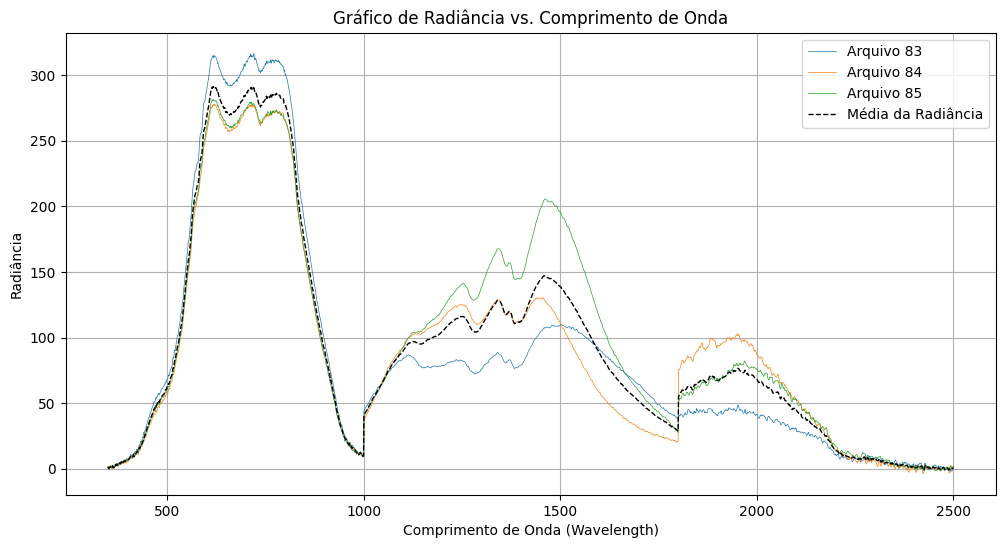

In [6]:
# 13_AGUA:AGUA 11, 12, 13 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1xHDcHWAdvLhcF88mu6C0z-DL_AsslCdM', # 83 = https://drive.google.com/file/d/1xHDcHWAdvLhcF88mu6C0z-DL_AsslCdM/view?usp=drive_link
    'https://drive.google.com/uc?id=1gyrXcZb6xYEJY8B5zke-uaJoSxY4cVjX', # 84 = https://drive.google.com/file/d/1gyrXcZb6xYEJY8B5zke-uaJoSxY4cVjX/view?usp=drive_link
    'https://drive.google.com/uc?id=11MvVQfT0V34a9L8388IxaVLqJt9oF_09'  # 85 = https://drive.google.com/file/d/11MvVQfT0V34a9L8388IxaVLqJt9oF_09/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material83.txt', 'agua_material84.txt', 'agua_material85.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua13 = pd.DataFrame()
agua13['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['83', '84', '85']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua13[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua13['Radiância_Média'] = agua13.iloc[:, 1:].mean(axis=1)
agua13.head()

# Exibir a média da radiância
# print(agua13[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua13['Wavelength'], agua13[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua13['Wavelength'], agua13['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()


### Água 13: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

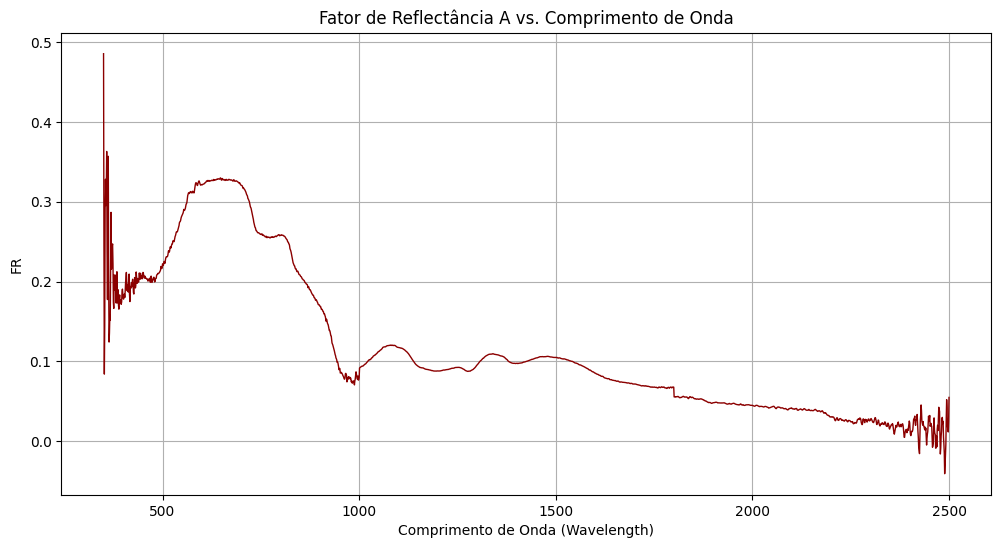

In [7]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A13 = agua13[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A13['FR'] = agua13['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A13.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A13['Wavelength'], FR_A13['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 12° alvo: medições 80, 81, 82

### Água 12: Importando e Visualizando; Média Radiância; Plot Radiância e Média

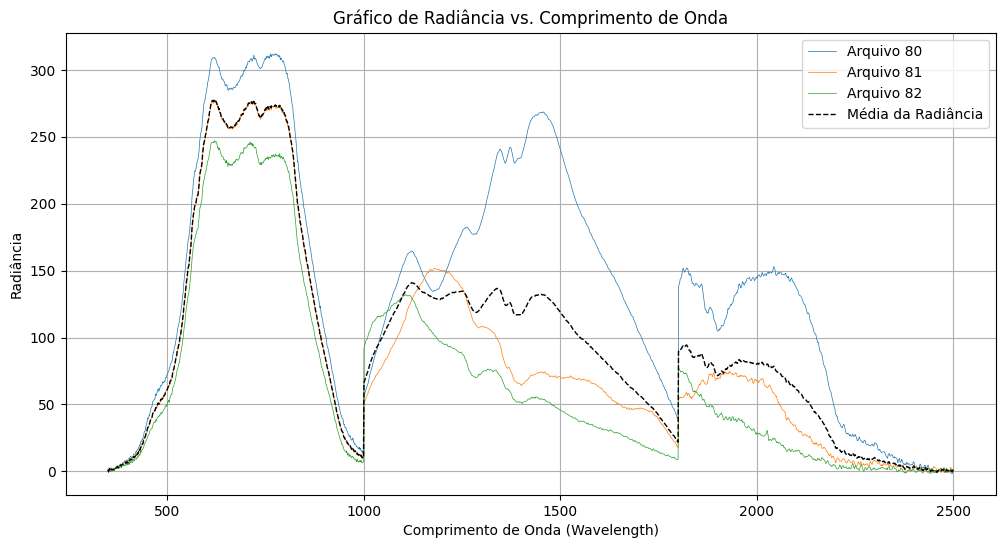

In [8]:
# 12_AGUA:AGUA 80, 81, 82 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1JxnucjWJlvte00moiSgO-Pd3R2fNDuf-', # 80 = https://drive.google.com/file/d/1JxnucjWJlvte00moiSgO-Pd3R2fNDuf-/view?usp=drive_link
    'https://drive.google.com/uc?id=1Fb07_YCUDbbskyWYlYpqo--bAc_kDVVo', # 81 = https://drive.google.com/file/d/1Fb07_YCUDbbskyWYlYpqo--bAc_kDVVo/view?usp=drive_link
    'https://drive.google.com/uc?id=1bIwk5YB8p_q0FB1gDl6aN5mRe3LN4FIc'  # 82 = https://drive.google.com/file/d/1bIwk5YB8p_q0FB1gDl6aN5mRe3LN4FIc/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material83.txt', 'agua_material84.txt', 'agua_material85.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua12 = pd.DataFrame()
agua12['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['80', '81', '82']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua12[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua12['Radiância_Média'] = agua12.iloc[:, 1:].mean(axis=1)
agua12.head()

# Exibir a média da radiância
# print(agua12[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua12['Wavelength'], agua12[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua12['Wavelength'], agua12['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()


### Água 12: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

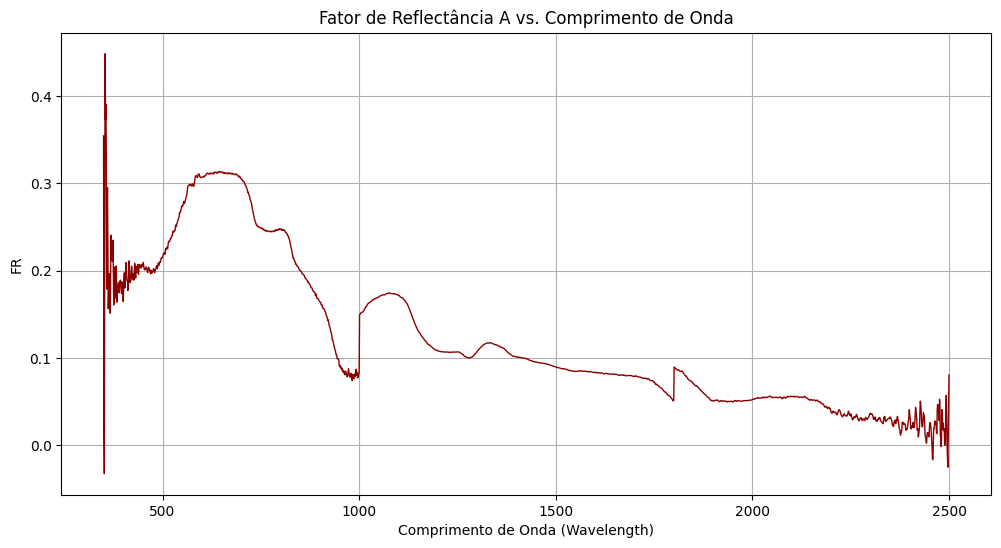

In [9]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A12 = agua12[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A12['FR'] = agua12['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A12.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A12['Wavelength'], FR_A12['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 11° alvo: medições 77, 78, 79

### Água 11: Importando e Visualizando; Média Radiância; Plot Radiância e Média



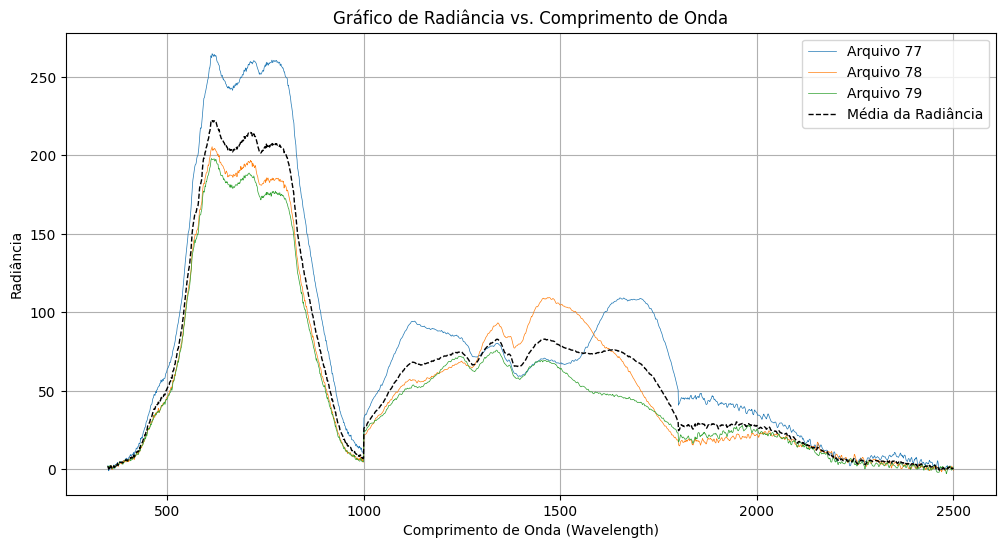

In [10]:
# 11_AGUA:AGUA 77, 78, 79 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1K72wOE8s-jmrYxlXReNs8UyQRG5FXuyj', # 77 = https://drive.google.com/file/d/1K72wOE8s-jmrYxlXReNs8UyQRG5FXuyj/view?usp=drive_link
    'https://drive.google.com/uc?id=1xzx9zu4VhHSzkytdgcYnW1tS_PiqCFyZ', # 78 = https://drive.google.com/file/d/1xzx9zu4VhHSzkytdgcYnW1tS_PiqCFyZ/view?usp=drive_link
    'https://drive.google.com/uc?id=1jJb1kwpj6H54WdFAcWWfvUiY9pMJtFsx'  # 79 = https://drive.google.com/file/d/1jJb1kwpj6H54WdFAcWWfvUiY9pMJtFsx/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material77.txt', 'agua_material78.txt', 'agua_material79.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua11 = pd.DataFrame()
agua11['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['77', '78', '79']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua11[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua11['Radiância_Média'] = agua11.iloc[:, 1:].mean(axis=1)
agua11.head()

# Exibir a média da radiância
# print(agua11[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua11['Wavelength'], agua11[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua11['Wavelength'], agua11['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

### Água 11: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

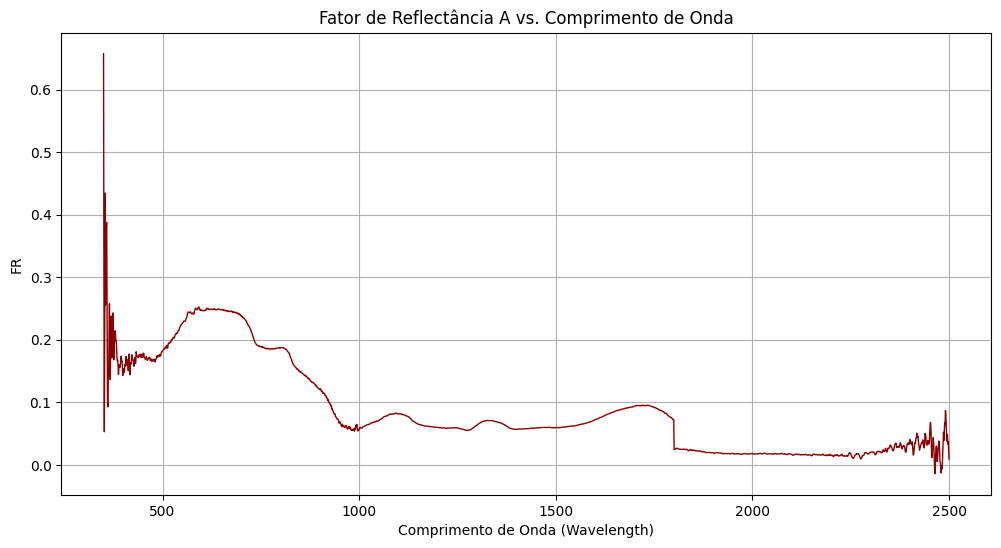

In [11]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A11 = agua11[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A11['FR'] = agua11['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A11.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A11['Wavelength'], FR_A11['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 10° alvo: medições 74, 75, 76

### Água 10: Importando e Visualizando; Média Radiância; Plot Radiância e Média

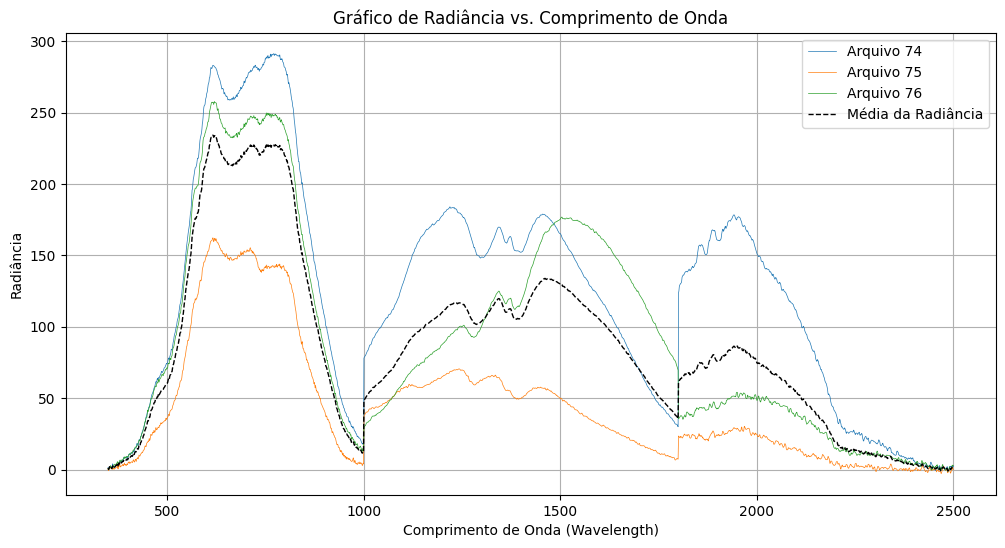

In [12]:
# 10_AGUA:AGUA 74, 75, 76 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1BcukCxqsTkC15LYjiYt76XVyvzcf7yJG', # 74 = https://drive.google.com/file/d/1BcukCxqsTkC15LYjiYt76XVyvzcf7yJG/view?usp=drive_link
    'https://drive.google.com/uc?id=12-zWYZWOiyzgCooz5mB46lpOvhO6OOiW', # 75 = https://drive.google.com/file/d/12-zWYZWOiyzgCooz5mB46lpOvhO6OOiW/view?usp=drive_link
    'https://drive.google.com/uc?id=1KT7WDDgedpWoMeDUuCm_dW6NwEXCftJr'  # 76 = https://drive.google.com/file/d/1KT7WDDgedpWoMeDUuCm_dW6NwEXCftJr/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material_amarelo_74.txt', 'agua_materialamarelo_75.txt', 'agua_materialamarelo_76.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua10 = pd.DataFrame()
agua10['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['74', '75', '76']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua10[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua10['Radiância_Média'] = agua10.iloc[:, 1:].mean(axis=1)
agua10.head()

# Exibir a média da radiância
# print(agua10[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua10['Wavelength'], agua10[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua10['Wavelength'], agua10['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

### Água 10: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

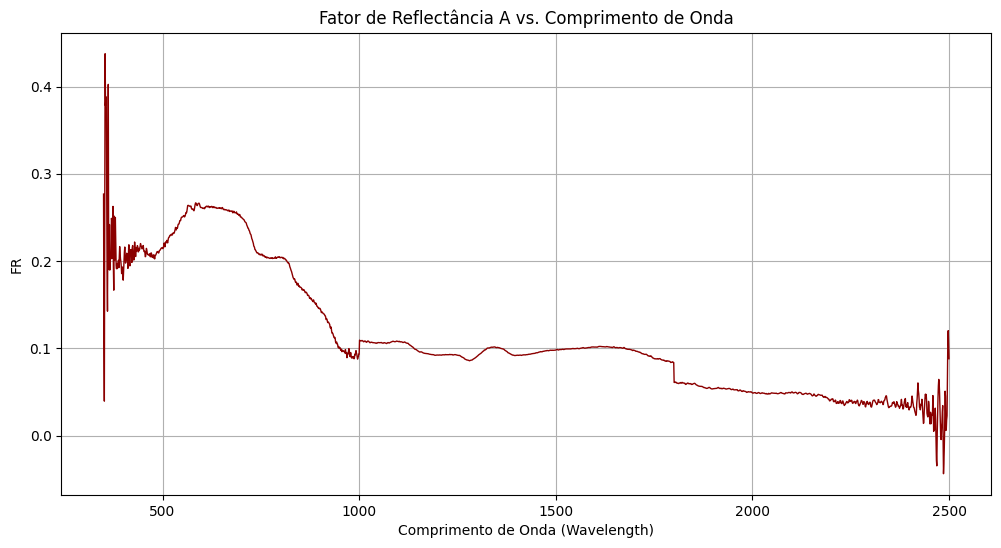

In [13]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A10 = agua10[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A10['FR'] = agua10['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A10.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A10['Wavelength'], FR_A10['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 9° alvo: medições 74, 75, 76

### Água 9: Importando e Visualizando; Média Radiância; Plot Radiância e Média

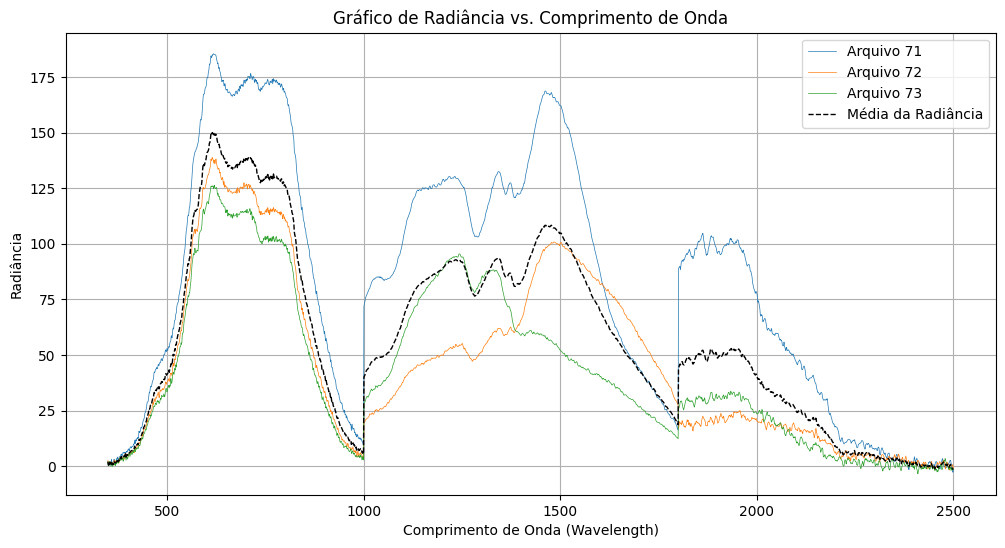

In [14]:
# 9_AGUA:AGUA 71, 72, 73 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1rHucQo3jDHLPAlmuLpa0JPDEvPbX5zFU', # 71 = https://drive.google.com/file/d/1rHucQo3jDHLPAlmuLpa0JPDEvPbX5zFU/view?usp=drive_link
    'https://drive.google.com/uc?id=1h0MraBa1bOGrwen4Qdfg8wGwZy9Q7xZy', # 72 = https://drive.google.com/file/d/1h0MraBa1bOGrwen4Qdfg8wGwZy9Q7xZy/view?usp=drive_link
    'https://drive.google.com/uc?id=1FLrOe9fvk8bR6l4WbI2l5kxtg1REKCmR'  # 73 = https://drive.google.com/file/d/1FLrOe9fvk8bR6l4WbI2l5kxtg1REKCmR/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material_amarelo_71.txt', 'agua_materialamarelo_72.txt', 'agua_materialamarelo_73.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua9 = pd.DataFrame()
agua9['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['71', '72', '73']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua9[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua9['Radiância_Média'] = agua9.iloc[:, 1:].mean(axis=1)
agua9.head()

# Exibir a média da radiância
# print(agua9[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua9['Wavelength'], agua9[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua9['Wavelength'], agua9['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

### Água 9: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

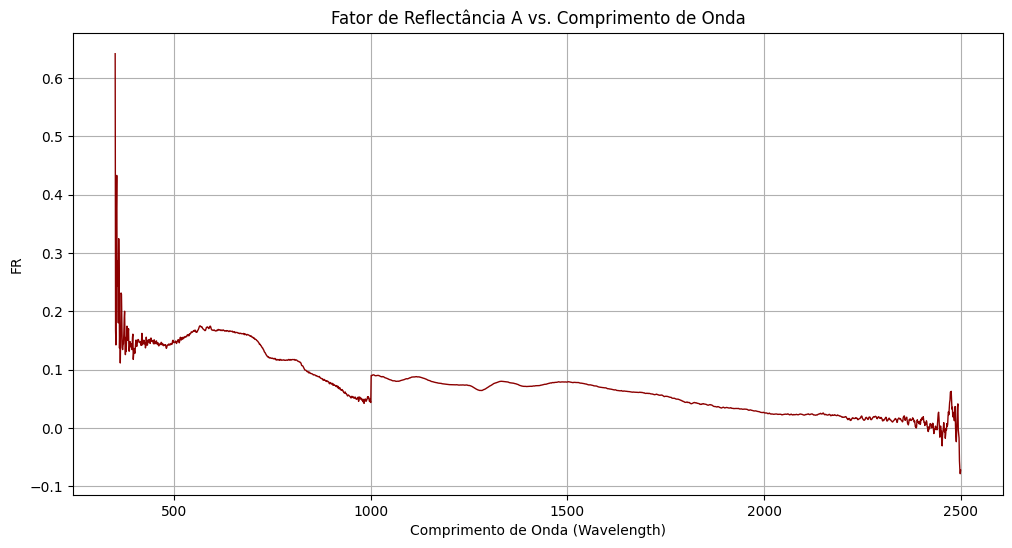

In [15]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A9 = agua9[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A9['FR'] = agua9['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A9.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A9['Wavelength'], FR_A9['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 8° alvo: medições 68, 69, 70

### Água 8: Importando e Visualizando; Média Radiância; Plot Radiância e Média

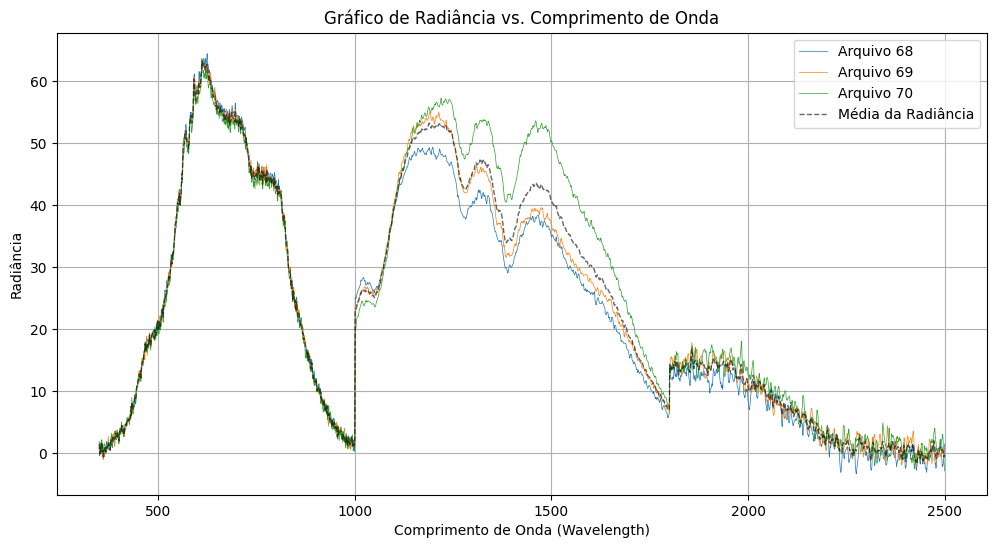

In [16]:
# 8_AGUA:AGUA 68, 69, 70 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1hy-A-NIq8cMk_ohHDh2QK5d1govDXNLN', # 68 = https://drive.google.com/file/d/1hy-A-NIq8cMk_ohHDh2QK5d1govDXNLN/view?usp=drive_link
    'https://drive.google.com/uc?id=1OcoQl0ySlvFGtxCGDV-LHNDDoA997yW9', # 69 = https://drive.google.com/file/d/1OcoQl0ySlvFGtxCGDV-LHNDDoA997yW9/view?usp=drive_link
    'https://drive.google.com/uc?id=1fTPn03_omtuQ0GCo62zofbjgdVq6K9YD'  # 70 = https://drive.google.com/file/d/1fTPn03_omtuQ0GCo62zofbjgdVq6K9YD/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material_amarelo_71.txt', 'agua_materialamarelo_72.txt', 'agua_materialamarelo_73.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua8 = pd.DataFrame()
agua8['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['68', '69', '70']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua8[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua8['Radiância_Média'] = agua8.iloc[:, 1:].mean(axis=1)
agua8.head()

# Exibir a média da radiância
# print(agua8[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua8['Wavelength'], agua8[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua8['Wavelength'], agua8['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--', alpha=0.6)

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

### Água 8: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

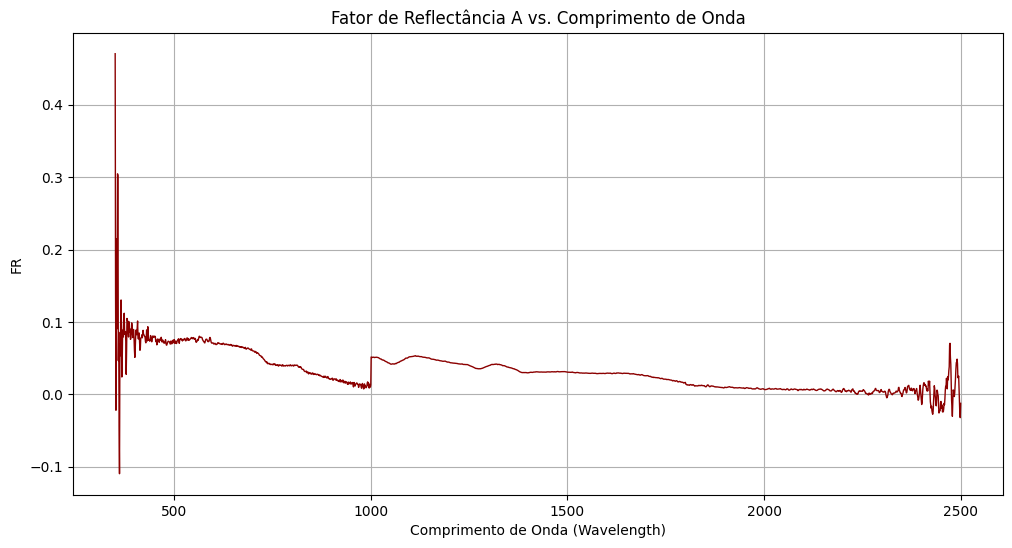

In [17]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A8 = agua8[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A8['FR'] = agua8['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A8.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A8['Wavelength'], FR_A8['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Comparações Alvos Água


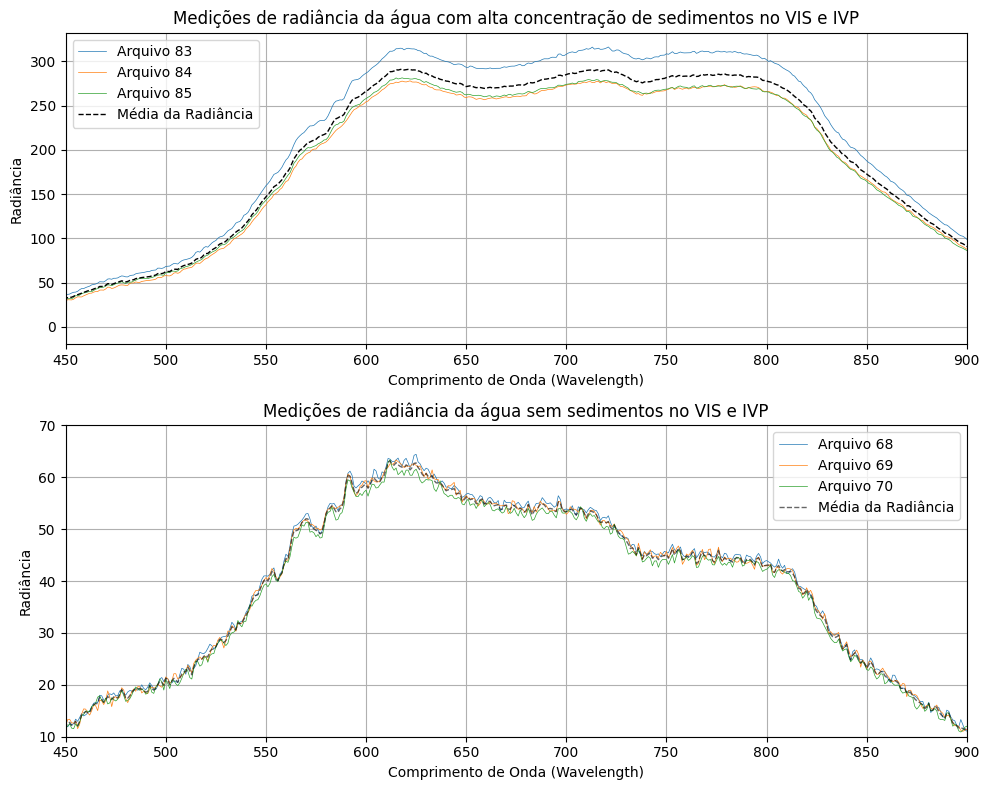

In [80]:
# Cria a figura e os eixos para os subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Supondo que agua13 tenha sufixos '83', '84', '85' e agua8 tenha sufixos '68', '69', '70'
sufixos_agua13 = ['83', '84', '85']
sufixos_agua8 = ['68', '69', '70']

# Primeiro gráfico
for sufixo in sufixos_agua13:
    ax1.plot(agua13['Wavelength'], agua13[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
ax1.plot(agua13['Wavelength'], agua13['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

ax1.set_title('Medições de radiância da água com alta concentração de sedimentos no VIS e IVP')
ax1.set_xlabel('Comprimento de Onda (Wavelength)')
ax1.set_ylabel('Radiância')
ax1.legend()
ax1.grid(True)

# Ajustar limites do eixo x e y para o primeiro gráfico
ax1.set_xlim(450, 900)
# ax1.set_ylim(10, 350)

# Segundo gráfico
for sufixo in sufixos_agua8:
    ax2.plot(agua8['Wavelength'], agua8[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
ax2.plot(agua8['Wavelength'], agua8['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--', alpha=0.6)

ax2.set_title('Medições de radiância da água sem sedimentos no VIS e IVP')
ax2.set_xlabel('Comprimento de Onda (Wavelength)')
ax2.set_ylabel('Radiância')
ax2.legend()
ax2.grid(True)

# Ajustar limites do eixo x e y para o segundo gráfico
ax2.set_xlim(450, 900)
ax2.set_ylim(10, 70)

# Ajusta o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibe os gráficos
plt.show()

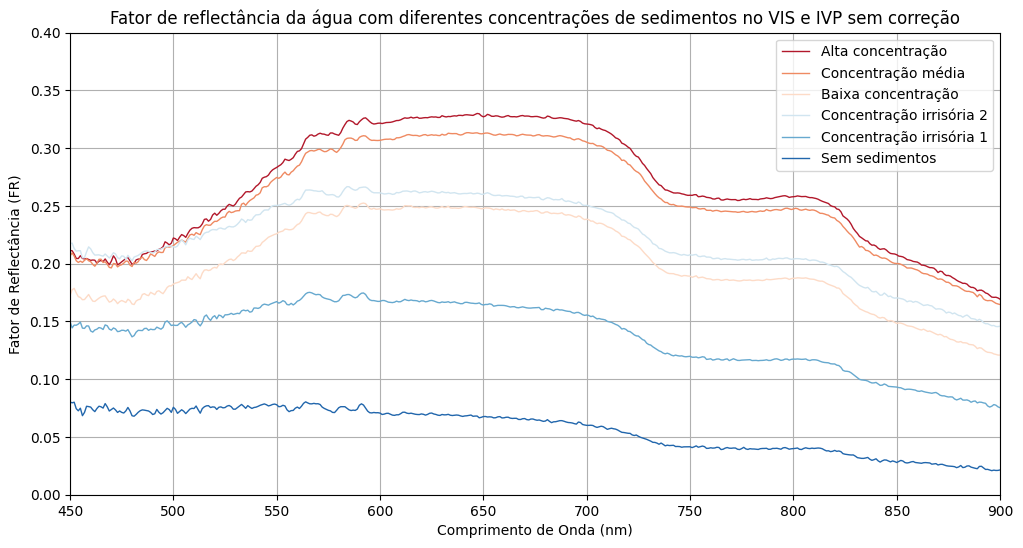

In [59]:
# Cálculo do fator de reflectância e plotagem sem a correção k
def plot_reflectance(agua, AguaPlaca_MR, k, color, label):
    FR = agua[['Wavelength']].copy()
    FR['FR'] = agua['Radiância_Média'] / (AguaPlaca_MR['Radiância_Média'])
    plt.plot(FR['Wavelength'], FR['FR'], linestyle='-', linewidth=1, label=label, color=color)

# Inicializar o gráfico
plt.figure(figsize=(12, 6))

# Plotar cada conjunto de dados com a correção aplicada
plot_reflectance(agua13, AguaPlaca_MR, k, '#b2182b', 'Alta concentração')
plot_reflectance(agua12, AguaPlaca_MR, k, '#ef8a62', 'Concentração média')
plot_reflectance(agua11, AguaPlaca_MR, k, '#fddbc7', 'Baixa concentração')
plot_reflectance(agua10, AguaPlaca_MR, k, '#d1e5f0', 'Concentração irrisória 2')
plot_reflectance(agua9, AguaPlaca_MR, k, '#67a9cf', 'Concentração irrisória 1')
plot_reflectance(agua8, AguaPlaca_MR, k, '#2166ac', 'Sem sedimentos')

# Adicionar título e rótulos
plt.title('Fator de reflectância da água com diferentes concentrações de sedimentos no VIS e IVP sem correção')
plt.xlabel('Comprimento de Onda (nm)')
plt.ylabel('Fator de Reflectância (FR)')
plt.legend()
plt.grid(True)

# Definir os limites do eixo x e y
plt.xlim(450, 900)
plt.ylim(0,0.40)  # Ajustar o eixo y para começar em 0

# Mostrar o gráfico
plt.show()

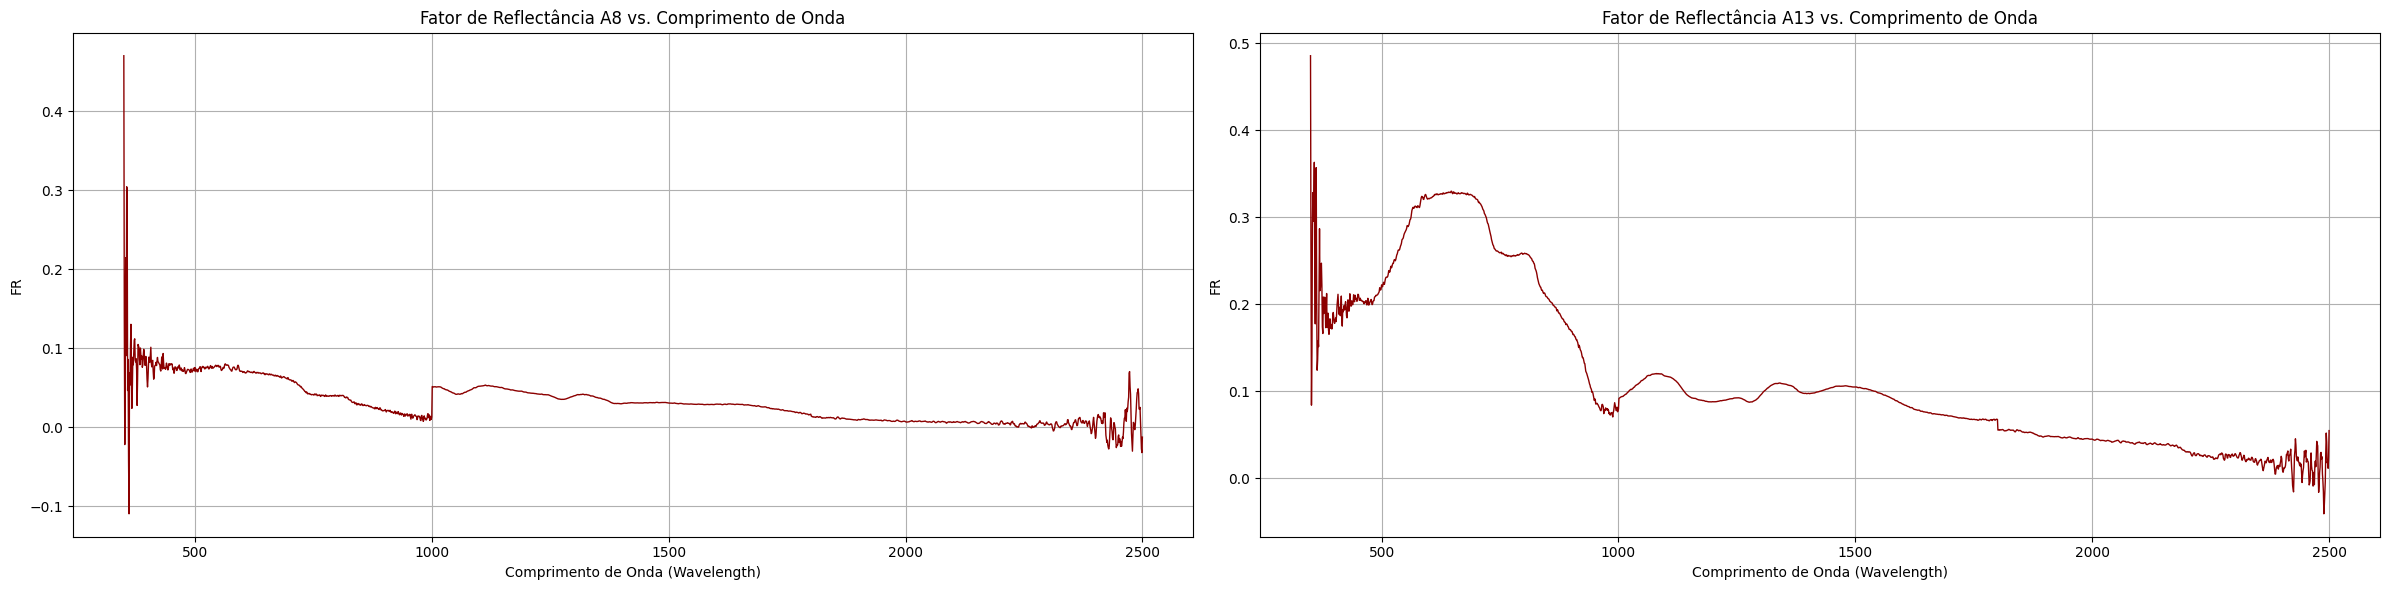

In [19]:
# COMPARANDO FATOR DE REFLECTÂNCIA DOS ALVOS A8 E A13 -------------------------------------------------------------------------------------------------------------------------------------------------
# Dados de exemplo
# Supondo que FR_A8 e FR_A13 sejam DataFrames com colunas 'Wavelength' e 'FR'

# Cria a figura e os eixos para os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Plota o primeiro gráfico no primeiro eixo
ax1.plot(FR_A8['Wavelength'], FR_A8['FR'], linestyle='-', color='darkred', linewidth=1)
ax1.set_title('Fator de Reflectância A8 vs. Comprimento de Onda')
ax1.set_xlabel('Comprimento de Onda (Wavelength)')
ax1.set_ylabel('FR')
ax1.grid(True)

# Plota o segundo gráfico no segundo eixo
ax2.plot(FR_A13['Wavelength'], FR_A13['FR'], linestyle='-', color='darkred', linewidth=1)
ax2.set_title('Fator de Reflectância A13 vs. Comprimento de Onda')
ax2.set_xlabel('Comprimento de Onda (Wavelength)')
ax2.set_ylabel('FR')
ax2.grid(True)

# Ajusta o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibe os gráficos
plt.show()

## PLOTAR UM GRÁFICO COM TODAS AS AMOSTRAS DE ÁGUA
### COM CALIBRAÇÃO DA PLACA DE REFERÊNCIA (K)

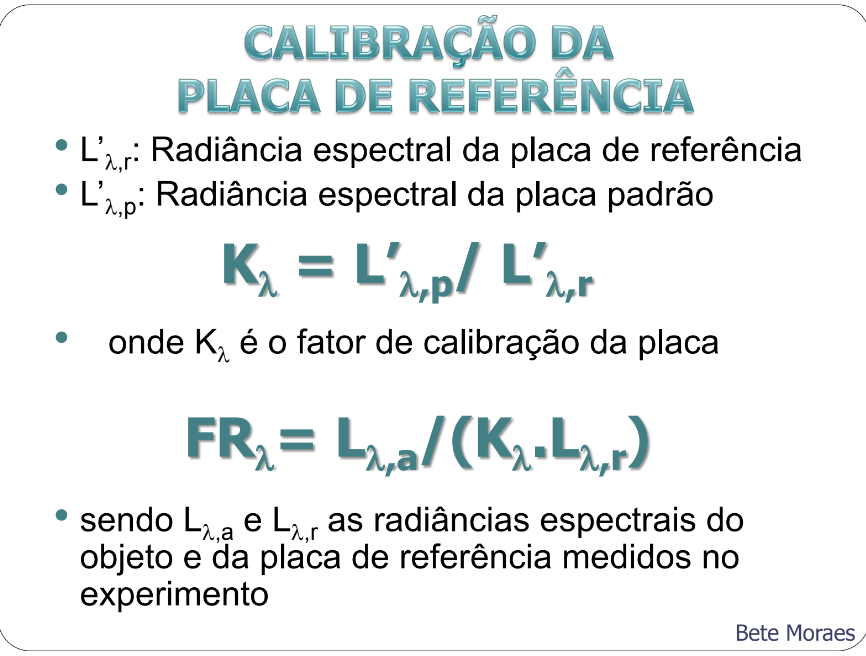

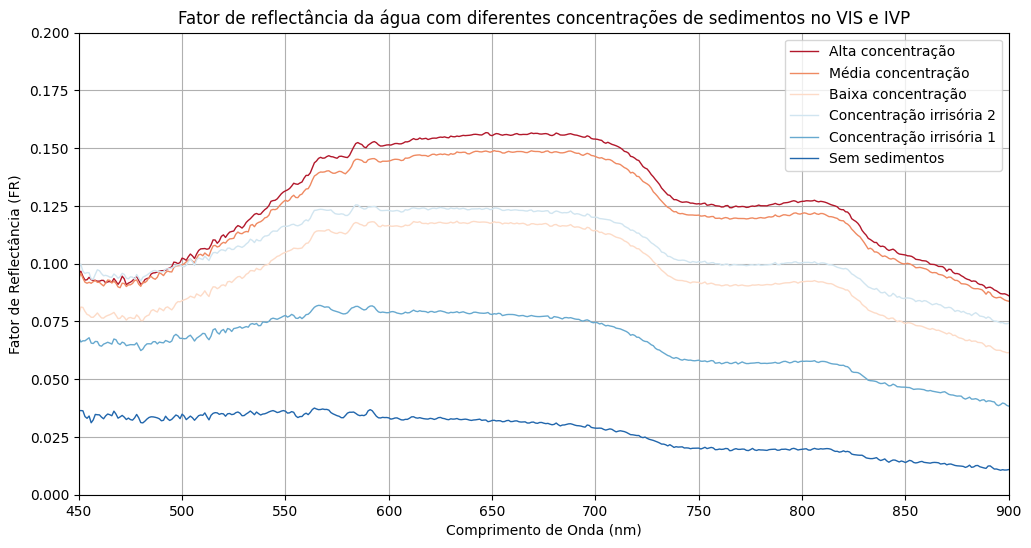

In [62]:
# Calcular a constante k
k = AguaPlaca_MR1['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Cálculo do fator de reflectância e plotagem com a correção
def plot_reflectance(agua, AguaPlaca_MR, k, color, label):
    FR = agua[['Wavelength']].copy()
    FR['FR'] = agua['Radiância_Média'] / (AguaPlaca_MR['Radiância_Média'] * k)
    plt.plot(FR['Wavelength'], FR['FR'], linestyle='-', linewidth=1, label=label, color=color)

# Inicializar o gráfico
plt.figure(figsize=(12, 6))

# Plotar cada conjunto de dados com a correção aplicada
plot_reflectance(agua13, AguaPlaca_MR, k, '#b2182b', 'Alta concentração')
plot_reflectance(agua12, AguaPlaca_MR, k, '#ef8a62', 'Média concentração')
plot_reflectance(agua11, AguaPlaca_MR, k, '#fddbc7', 'Baixa concentração')
plot_reflectance(agua10, AguaPlaca_MR, k, '#d1e5f0', 'Concentração irrisória 2')
plot_reflectance(agua9, AguaPlaca_MR, k, '#67a9cf', 'Concentração irrisória 1')
plot_reflectance(agua8, AguaPlaca_MR, k, '#2166ac', 'Sem sedimentos')

# Adicionar título e rótulos
plt.title('Fator de reflectância da água com diferentes concentrações de sedimentos no VIS e IVP')
plt.xlabel('Comprimento de Onda (nm)')
plt.ylabel('Fator de Reflectância (FR)')
plt.legend()
plt.grid(True)

# Definir os limites do eixo x e y
plt.xlim(450, 900)
plt.ylim(0,0.20)  # Ajustar o eixo y para começar em 0

# Mostrar o gráfico
plt.show()

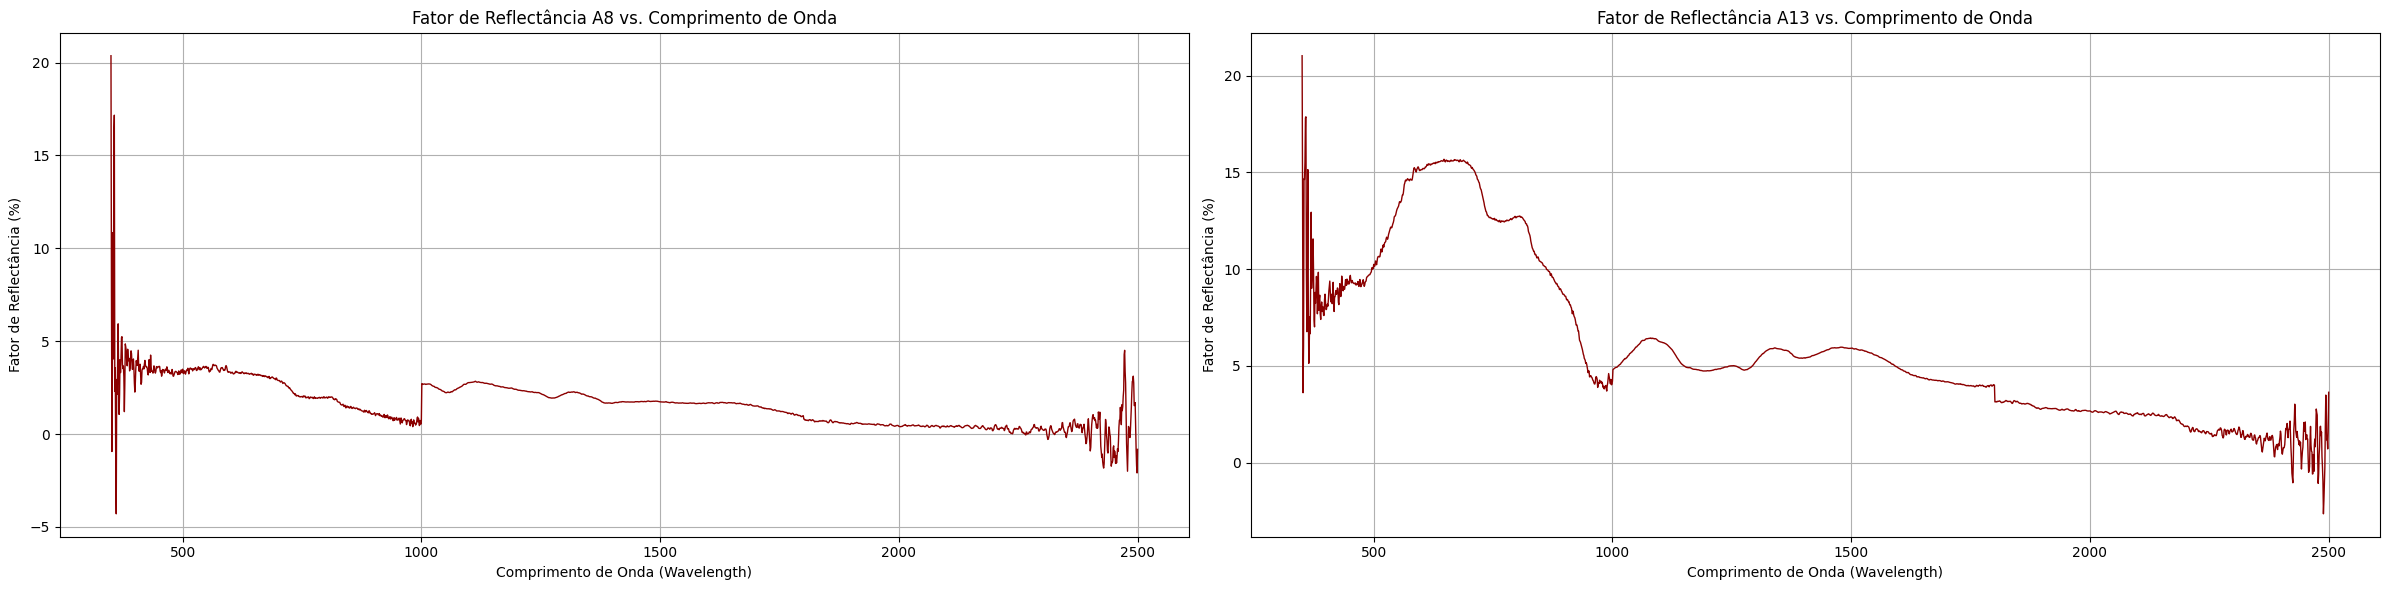

In [48]:
# Calcular a constante k
k = AguaPlaca_MR1['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Função para plotar o fator de reflectância corrigido
def plot_reflectance(agua, AguaPlaca_MR, k, color, label):
    FR = agua[['Wavelength']].copy()
    FR['FR'] = (agua['Radiância_Média'] / (AguaPlaca_MR['Radiância_Média'] * k)) * 100
    return FR

# Calcular o fator de reflectância corrigido para A8 e A13
FR_A8 = plot_reflectance(agua8, AguaPlaca_MR, k, 'darkred', 'Sem sedimentos (A8)')
FR_A13 = plot_reflectance(agua13, AguaPlaca_MR, k, 'darkred', 'Alta concentração de sedimentos (A13)')

# Cria a figura e os eixos para os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Plota o primeiro gráfico no primeiro eixo
ax1.plot(FR_A8['Wavelength'], FR_A8['FR'], linestyle='-', color='darkred', linewidth=1)
ax1.set_title('Fator de Reflectância A8 vs. Comprimento de Onda')
ax1.set_xlabel('Comprimento de Onda (Wavelength)')
ax1.set_ylabel('Fator de Reflectância (%)')
ax1.grid(True)

# Plota o segundo gráfico no segundo eixo
ax2.plot(FR_A13['Wavelength'], FR_A13['FR'], linestyle='-', color='darkred', linewidth=1)
ax2.set_title('Fator de Reflectância A13 vs. Comprimento de Onda')
ax2.set_xlabel('Comprimento de Onda (Wavelength)')
ax2.set_ylabel('Fator de Reflectância (%)')
ax2.grid(True)

# Ajusta o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibe os gráficos
plt.show()

## SOLO

## FOLHAS